<a href="https://colab.research.google.com/github/shrishpellakur00/Linear-Regression/blob/main/revenue_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting business revenue based on the the air quality using a machine learning algorithm



1.   Import the libraries
2.   Import the dataset. Store that dataset in a pandas dataframe. Describe that dataframe and gather information about it.
3.   Display the dataframe using matplotlib library. Label the graph.
4.   Create a testing and training dataset. Build a model which suits the dataset.
5.   Evaluate the model. Use an optimizer. Plot the model loss progress during the training.

In [ ]:
# Importing the libraries

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing the dataset

from google.colab import files
uploaded = files.upload()

In [ ]:
# Storing the imported dataset into the pandas dataframe

import io
df = pd.read_csv(io.BytesIO(uploaded['SalesData.csv']))

In [ ]:
# Gathering information about the data 

df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


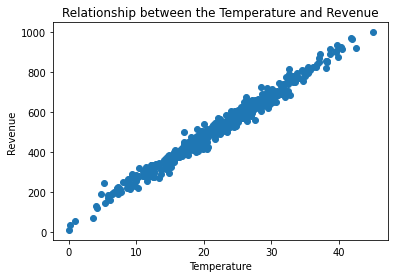

In [ ]:
# Display the contents of the dataframe in a graph 

plt.scatter(df['Temperature'], df['Revenue']);
plt.title('Relationship between the Temperature and Revenue');
plt.xlabel('Temperature');
plt.ylabel('Revenue');

In [ ]:
# Split the dataset into training set

X_train = df['Temperature']
y_train = df['Revenue']

In [ ]:
# Finding the shape of the training set

X_train.shape, y_train.shape

((500,), (500,))

In [ ]:
# Building the model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [ ]:
# Compiling the model

model.compile(optimizer =tf.keras.optimizers.Adam(0.1),loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
16/16 [==============================] - 0s 997us/step - loss: 326328.2500
Epoch 2/1000
16/16 [==============================] - 0s 859us/step - loss: 283803.8438
Epoch 3/1000
16/16 [==============================] - 0s 991us/step - loss: 245261.5625
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 210012.9531
Epoch 5/1000
16/16 [==============================] - 0s 952us/step - loss: 179445.1719
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 152098.6875
Epoch 7/1000
16/16 [==============================] - 0s 979us/step - loss: 128239.7109
Epoch 8/1000
16/16 [==============================] - 0s 962us/step - loss: 107407.3203
Epoch 9/1000
16/16 [==============================] - 0s 1ms/step - loss: 89303.4219
Epoch 10/1000
16/16 [==============================] - 0s 1ms/step - loss: 73756.3906
Epoch 11/1000
16/16 [==============================] - 0s 880us/step - loss: 60594.1367
Epoch 12/1000
16/16 [====================

In [ ]:
# Evaluate the model

epochs_hist.history.keys()

dict_keys(['loss'])

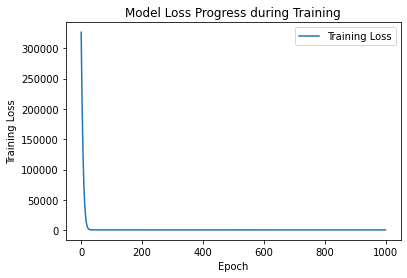

In [ ]:
#Plotting the Model Loss Progress during training

plt.plot(epochs_hist.history['loss']);
plt.title('Model Loss Progress during Training');
plt.xlabel('Epoch');
plt.ylabel('Training Loss');
plt.legend(['Training Loss']);

In [ ]:
# Get the weights of the model

model.get_weights()

[array([[21.404259]], dtype=float32), array([44.718388], dtype=float32)]

In [ ]:
# Use the trained model to perform predictions

Temp = 40;
Revenue = model.predict([Temp]);
print(Revenue);

[[900.88873]]


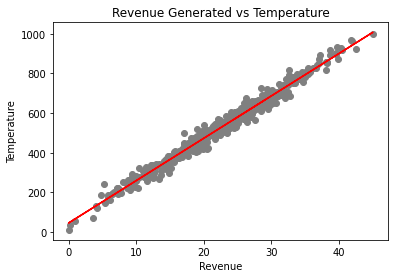

In [ ]:
# Plot the findings

plt.scatter( X_train, y_train, color = 'grey' );
plt.plot( X_train, model.predict(X_train), color = 'red');
plt.title('Revenue Generated vs Temperature');
plt.xlabel('Revenue');
plt.ylabel('Temperature');
